In [104]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

mnist = fetch_openml('mnist_784', version=1)

In [219]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
import numpy as np

X_train, X_val, y_train, y_val= train_test_split(mnist['data'], mnist['target'])

print("Training data: ", len(X_train))
print("Validation data: ", len(X_val))

gbrt = RandomForestClassifier(n_estimators=1000, n_jobs=-1)
gbrt.fit(X_train, y_train)

print("Fit done! Classes: ", gbrt.classes_)

Training data:  52500
Validation data:  17500
Fit done! Classes:  ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


In [220]:
# predict all validation data
y_prediction = gbrt.predict(X_val)

In [208]:
error = mean_absolute_error(y_prediction, y_val)
print("MSE:", error)

MSE: 0.11051428571428572


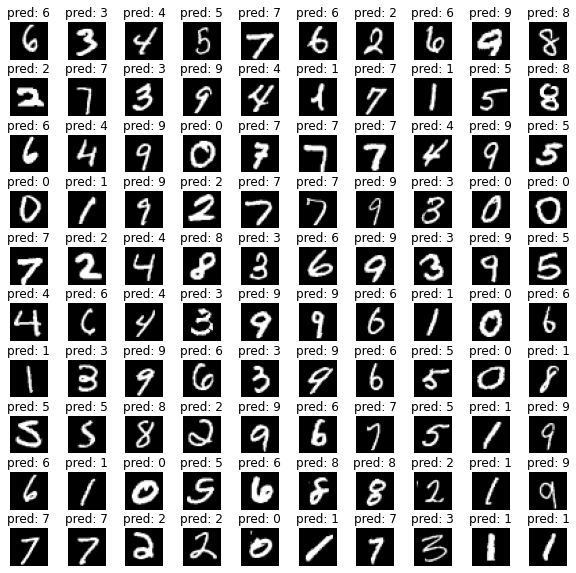

In [230]:
fig, axes = plt.subplots(nrows=10, ncols=10, figsize=(10, 10))

# Die Subplots durchlaufen und die Bilder plotten
for idx, ax in enumerate(axes.flat):
    ax.imshow(X_val.iloc[idx].values.reshape(28,28), cmap='gray')
    ax.set_title(f"pred: {y_prediction[idx]}")
    ax.axis('off')  # Achsen ausblenden

plt.subplots_adjust(wspace=0.5, hspace=0.5)